 AAI614: Data Science & its Applications

*Project 1*

<a href="https://colab.research.google.com/github/ahmad-raad/AAI614_raad/blob/main/project1/Project1_Census_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Section 1: Data Exploration

### Load Dataset and Check the columns of the data and their expected data types

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import statsmodels.api as sm

# Load dataset

file_path = 'https://raw.githubusercontent.com/ahmad-raad/AAI614_raad/main/Project1/adult.data'
columns = [
    'age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status',
    'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss',
    'hours_per_week', 'native_country', 'income'
]
data = pd.read_csv(file_path, header=None, names=columns, na_values=' ?', skipinitialspace=True)

# Create a function to check expected vs actual data types
expected_types = {
    'age': 'int64',
    'workclass': 'object',
    'fnlwgt': 'int64',
    'education': 'object',
    'education_num': 'int64',
    'marital_status': 'object',
    'occupation': 'object',
    'relationship': 'object',
    'race': 'object',
    'sex': 'object',
    'capital_gain': 'int64',
    'capital_loss': 'int64',
    'hours_per_week': 'int64',
    'native_country': 'object',
    'income': 'object'
}

# Get actual types from the dataset
actual_types = data.dtypes.astype(str).to_dict()

# Create a comparison DataFrame
comparison_df = pd.DataFrame({
    "Expected": pd.Series(expected_types),
    "Actual": pd.Series(actual_types)
})
comparison_df["Match"] = comparison_df["Expected"] == comparison_df["Actual"]

# Display the output for the user using the display method of the pandas DataFrame

print("Expected vs Actual Data Type Comparison:")
display(comparison_df)

Expected vs Actual Data Type Comparison:


,Expected,Actual,Match
age,int64,int64,True
workclass,object,object,True
fnlwgt,int64,int64,True
education,object,object,True
education_num,int64,int64,True
marital_status,object,object,True
occupation,object,object,True
relationship,object,object,True
race,object,object,True
sex,object,object,True


### How are missing values represented?

In [7]:
# Replace missing values represented as '?' with np.nan
data.replace("?", pd.NA, inplace=True)

# Count missing values in each column
missing_values_count = data.isna().sum()
missing_values_count

,0
age,0
workclass,1836
fnlwgt,0
education,0
education_num,0
marital_status,0
occupation,1843
relationship,0
race,0
sex,0


### Individually plot the distributions of capital_gain and capital_loss

---



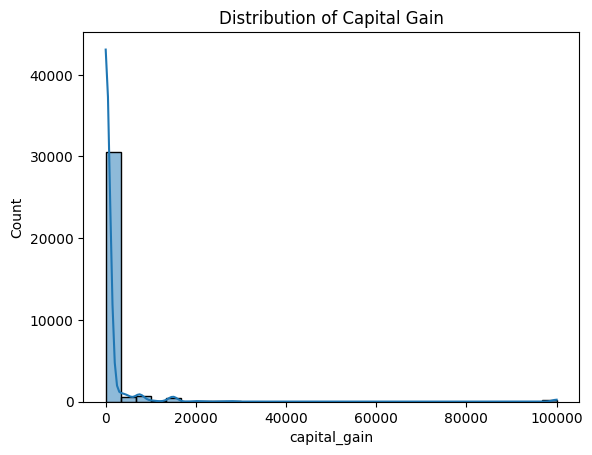

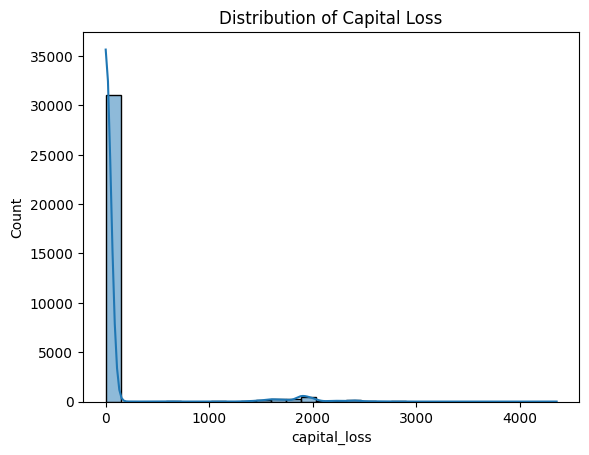

,capital_gain_cat,capital_loss_cat
Gain,2712.0,NaN
Loss,NaN,1519.0
No Gain,29849.0,NaN
No Loss,NaN,31042.0


In [8]:
# Capital gain and loss distributions
sns.histplot(data['capital_gain'], bins=30, kde=True)
plt.title('Distribution of Capital Gain')
plt.show()

sns.histplot(data['capital_loss'], bins=30, kde=True)
plt.title('Distribution of Capital Loss')
plt.show()

# Both variables are highly skewed, with a majority of values concentrated at 0.
# This distribution suggests that transforming these variables into categorical variables (e.g., "no gain/loss" vs. "gain/loss") could simplify their analysis.

# Transformations
data['capital_gain_cat'] = data['capital_gain'].apply(lambda x: 'No Gain' if x == 0 else 'Gain')
data['capital_loss_cat'] = data['capital_loss'].apply(lambda x: 'No Loss' if x == 0 else 'Loss')
data[['capital_gain_cat', 'capital_loss_cat']].apply(lambda col: col.value_counts())

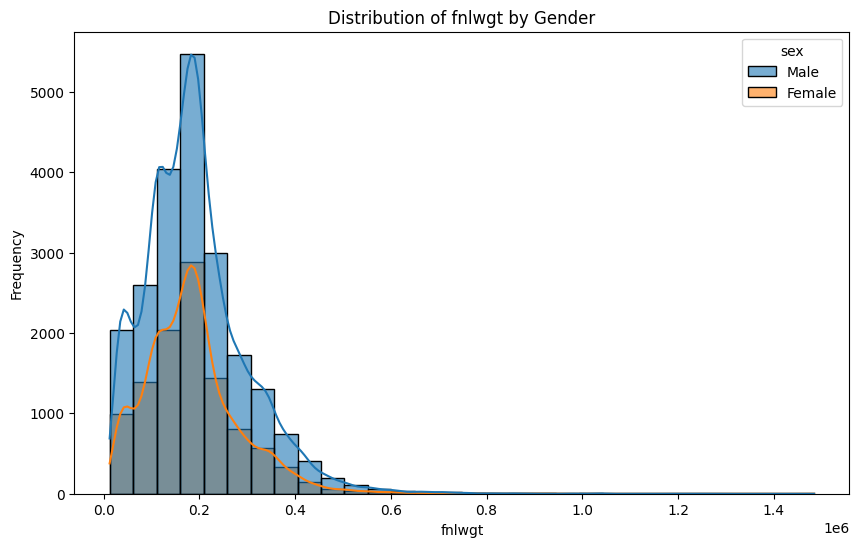

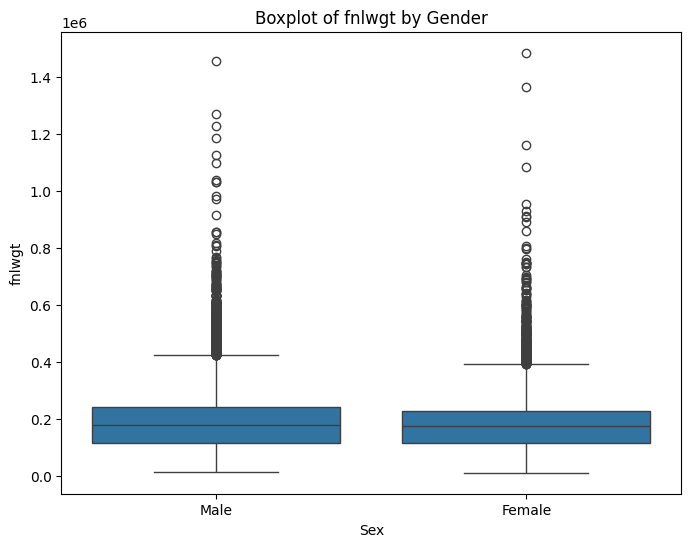

fnlwgt Summary Statistics:
          count           mean            std      min       25%       50%  \
fnlwgt  32561.0  189778.366512  105549.977697  12285.0  117827.0  178356.0   

             75%        max  
fnlwgt  237051.0  1484705.0  

fnlwgt Summary by Gender:
          count           mean            std      min        25%       50%  \
sex                                                                           
Female  10771.0  185746.311206  102986.078821  12285.0  117363.00  176077.0   
Male    21790.0  191771.449013  106740.702676  13769.0  118200.75  180140.0   

              75%        max  
sex                           
Female  228331.50  1484705.0  
Male    241146.25  1455435.0  
Number of outliers detected: 992
Number of missing values in 'fnlwgt_cleaned': 992

Summary statistics of 'fnlwgt_cleaned':
count     31569.00000
mean     179631.33913
std       87369.69144
min       12285.00000
25%      116508.00000
50%      175935.00000
75%      228570.00000
max      4

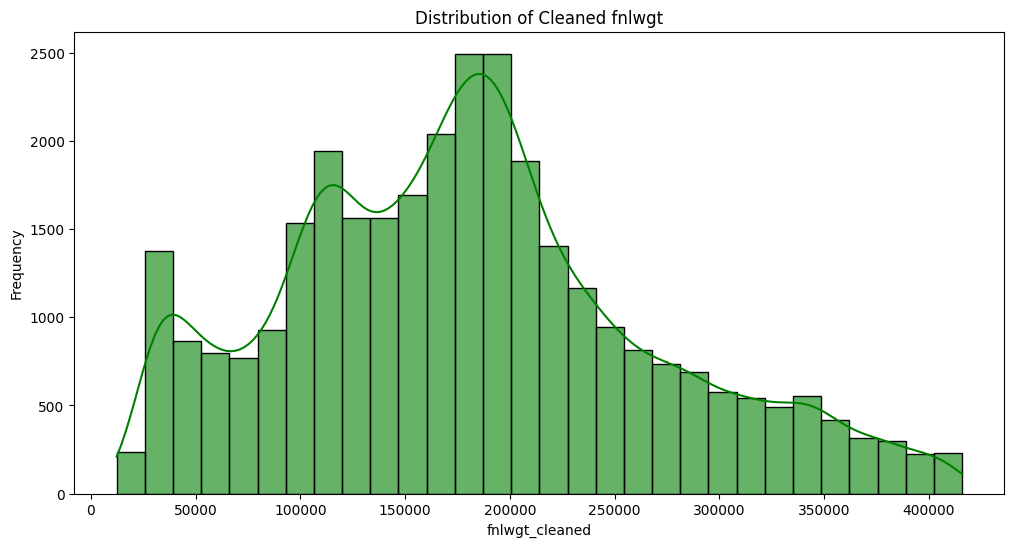

In [16]:
# Summarize the transformed variables
capital_gain_summary = data['capital_gain_cat'].value_counts()
capital_loss_summary = data['capital_loss_cat'].value_counts()

# Numerical summary of fnlwgt
fnlwgt_summary = data['fnlwgt'].describe()

# Distribution comparison of fnlwgt between men and women
fnlwgt_gender_summary = data.groupby('sex')['fnlwgt'].describe()

# Visualize fnlwgt distribution for men and women
plt.figure(figsize=(10, 6))
sns.histplot(data, x='fnlwgt', hue='sex', kde=True, bins=30, alpha=0.6)
plt.title('Distribution of fnlwgt by Gender')
plt.xlabel('fnlwgt')
plt.ylabel('Frequency')
plt.show()

# Boxplot to visualize differences
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='sex', y='fnlwgt')
plt.title('Boxplot of fnlwgt by Gender')
plt.xlabel('Sex')
plt.ylabel('fnlwgt')
plt.show()

# Output summaries
print("fnlwgt Summary Statistics:")
print(pd.DataFrame(fnlwgt_summary).T)
print("\nfnlwgt Summary by Gender:")
print(fnlwgt_gender_summary)

# Identify outliers using the IQR method for 'fnlwgt'
Q1 = data['fnlwgt'].quantile(0.25)
Q3 = data['fnlwgt'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = data[(data['fnlwgt'] < lower_bound) | (data['fnlwgt'] > upper_bound)]
print(f"Number of outliers detected: {outliers.shape[0]}")

# Set outliers' 'fnlwgt' values to NaN
data['fnlwgt_cleaned'] = data['fnlwgt']
data.loc[outliers.index, 'fnlwgt_cleaned'] = np.nan

# Verify that outliers are set to NaN
print("Number of missing values in 'fnlwgt_cleaned':", data['fnlwgt_cleaned'].isnull().sum())

# Proceed with analyses using 'fnlwgt_cleaned' instead of 'fnlwgt'

# Recalculate summary statistics after removing outliers
fnlwgt_cleaned_summary = data['fnlwgt_cleaned'].describe()
print("\nSummary statistics of 'fnlwgt_cleaned':")
print(fnlwgt_cleaned_summary)

# Visualize the cleaned distributions
plt.figure(figsize=(12, 6))
sns.histplot(data=data, x='fnlwgt_cleaned', bins=30, kde=True, color='green', alpha=0.6)
plt.title('Distribution of Cleaned fnlwgt')
plt.xlabel('fnlwgt_cleaned')
plt.ylabel('Frequency')
plt.show()

###Is the variable symmetrically distributed?
The fnlwgt variable is not symmetrically distributed. The mean is higher than the median for both the entire dataset and within each gender, indicating a slight skew toward higher values. Additionally, the histogram shows a long tail on the right side, confirming this right-skewed pattern

###Compare the distribution of this variable between men and women and comment on any trends you notice.Should outliers be excluded?

The distribution of the fnlwgt variable differs slightly between men and women:

Trends Observed:

Men: The average fnlwgt (mean) is slightly higher than that of women, and their values have a broader range, as shown by the larger standard deviation.

Women: The average fnlwgt is slightly lower, and their distribution is more concentrated around the median.

Both groups show a similar pattern with right-skewed distributions, meaning most values are clustered toward the lower end, with a few higher values creating a long tail.

Outliers:

Outliers, which are extreme values far from the main cluster of data, were identified using the interquartile range (IQR) method. These values can distort analyses by overemphasizing rare cases.
Therefore, yes, outliers should be excluded. These values were set to missing (NaN) to prevent them from influencing further calculations.

## Section 2: Correlation

###Find the correlations between age, education_num, and hours_per_week.

In [17]:
# Correlation analysis
correlation_matrix = data[['age', 'education_num', 'hours_per_week']].corr()
print(correlation_matrix)

# Gender-specific correlation
male_data = data[data['sex'] == 'Male']
female_data = data[data['sex'] == 'Female']
male_corr, male_pval = pearsonr(male_data['age'], male_data['education_num'])
female_corr, female_pval = pearsonr(female_data['age'], female_data['education_num'])

print(f"Male Correlation: {male_corr}, p-value: {male_pval}")
print(f"Female Correlation: {female_corr}, p-value: {female_pval}")


                     age  education_num  hours_per_week
age             1.000000       0.036527        0.068756
education_num   0.036527       1.000000        0.148123
hours_per_week  0.068756       0.148123        1.000000
Male Correlation: 0.060486409198268254, p-value: 4.0229868301397012e-19
Female Correlation: -0.017899243935447704, p-value: 0.06322895030880732


###Do any of the variables appear to be correlated?

The relationship between education_num (education level) and hours_per_week shows a slight positive correlation (0.148). While it's not a strong correlation, it suggests that people with higher education levels may work slightly more hours per week.

The other variable pairs (age and education_num, age and hours_per_week) show very weak correlations (close to 0), meaning there is little to no relationship between these variables.

###How did you make your assessment?

We calculated correlation coefficients, which measure the strength and direction of relationships between variables.

A coefficient closer to 1 or -1 indicates a strong relationship, while values closer to 0 show a weak or no relationship. Here, most values are close to 0, except for the small relationship between education_num and hours_per_week.

###Statistically test any variable pairs with a correlation coefficient > |0.1| for its difference from 0 and report your result

In [18]:
# Test significant correlations
significant_corrs = correlation_matrix.unstack()[(abs(correlation_matrix.unstack()) > 0.1) & (correlation_matrix.unstack() != 1)]
correlation_tests = {}
for idx, value in significant_corrs.items():
    var1, var2 = idx
    corr, p_value = pearsonr(data[var1].dropna(), data[var2].dropna())
    correlation_tests[(var1, var2)] = {'correlation': corr, 'p_value': p_value}
correlation_tests

{('education_num', 'hours_per_week'): {'correlation': 0.1481227326229122,
  'p_value': 4.236647478996013e-159},
 ('hours_per_week', 'education_num'): {'correlation': 0.1481227326229122,
  'p_value': 4.236647478996013e-159}}

###Is the direction and significance of your finding as expected?
The results show a positive correlation between education level (education_num) and hours worked per week, with a value of 0.148. This means that, on average, people with higher education tend to work slightly more hours.

In summary, the direction (positive) and significance of the correlation are as expected. While the relationship is weak, it supports the idea that higher education often leads to jobs that may require more working hours.

### Correlation between education_num and age by gender

In [19]:
male_data = data[data['sex'] == 'Male']
female_data = data[data['sex'] == 'Female']
male_corr, male_p = pearsonr(male_data['education_num'].dropna(), male_data['age'].dropna())
female_corr, female_p = pearsonr(female_data['education_num'].dropna(), female_data['age'].dropna())

{'Male': (male_corr, male_p), 'Female': (female_corr, female_p)}

{'Male': (0.060486409198268254, 4.0229868301397012e-19),
 'Female': (-0.017899243935447704, 0.06322895030880732)}

###How does the correlation (and its significance) between education_num and age compare between male and female participants?

For men, there is a very weak positive correlation (0.060) between education level and age, which is statistically significant. This means that as men get older, their education levels tend to increase slightly, possibly due to delayed education or lifelong learning.

For women, the correlation is almost nonexistent (-0.018) and not statistically significant. This indicates that there’s no meaningful relationship between age and education level for women in this dataset.

###Is this expected?

The small but significant correlation for men aligns with expectations, as some older men may have pursued education later in life.

For women, the lack of a relationship might reflect social or cultural factors that historically limited educational opportunities for women, especially in older generations.

### Compute covariance matrix for education_num and hours_per_week

In [20]:
covariance_matrix = data[['education_num', 'hours_per_week']].cov()
covariance_matrix

,education_num,hours_per_week
education_num,6.618890,4.705338
hours_per_week,4.705338,152.458995


###What conclusions can you draw from the covariance matrix?

The covariance matrix confirms a slight positive relationship between education level and hours worked. While both variables vary independently, the shared positive covariance suggests that higher education levels may be associated with slightly more working hours.

## Section 3: Regression Analysis

In [21]:
# Regression models
data['sex_binary'] = data['sex'].apply(lambda x: 1 if x == 'Male' else 0)
data['gross_income_group'] = data['income'].apply(lambda x: 1 if x == '>50K' else 0)

X1 = sm.add_constant(data['sex_binary'])
y = data['hours_per_week']
model1 = sm.OLS(y, X1).fit()

X2 = sm.add_constant(data[['sex_binary', 'education_num']])
model2 = sm.OLS(y, X2).fit()

X3 = sm.add_constant(data[['sex_binary', 'education_num', 'gross_income_group']])
model3 = sm.OLS(y, X3).fit()

print(model1.summary())
print(model2.summary())
print(model3.summary())


                            OLS Regression Results                            
Dep. Variable:         hours_per_week   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     1807.
Date:                Sun, 24 Nov 2024   Prob (F-statistic):               0.00
Time:                        11:40:44   Log-Likelihood:            -1.2716e+05
No. Observations:               32561   AIC:                         2.543e+05
Df Residuals:                   32559   BIC:                         2.543e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4104      0.116    314.412      0.0